# Level 1 : Task 1 

(9551, 21)
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online del

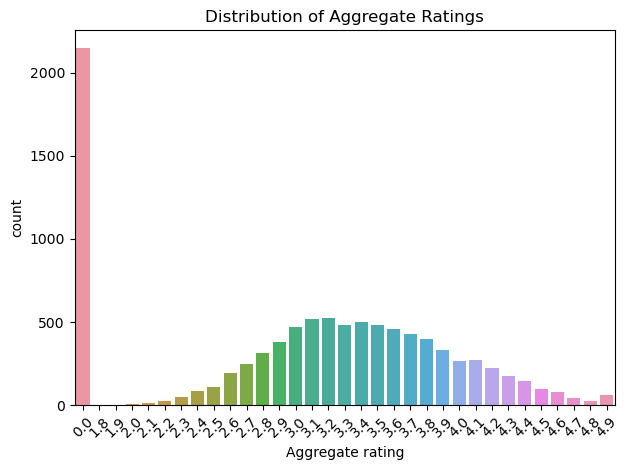

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset .csv')

print(df.shape)
print(df.isnull().sum())
print(df.dtypes)

df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
print(df.dtypes)
print(df['Aggregate rating'].value_counts().sort_index())

sns.countplot(data=df, x='Aggregate rating')
plt.title('Distribution of Aggregate Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Level 1: Task 2 

In [4]:
print(df.describe())
print(df[['Country Code', 'City', 'Cuisines']].describe(include='all'))

top_cuisines = df['Cuisines'].value_counts().head(10)
print(top_cuisines)

top_cities = df['City'].value_counts().head(10)
print(top_cities)


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

# Level 1: Task 3

Plotting restaurant locations by latitude and longitude...


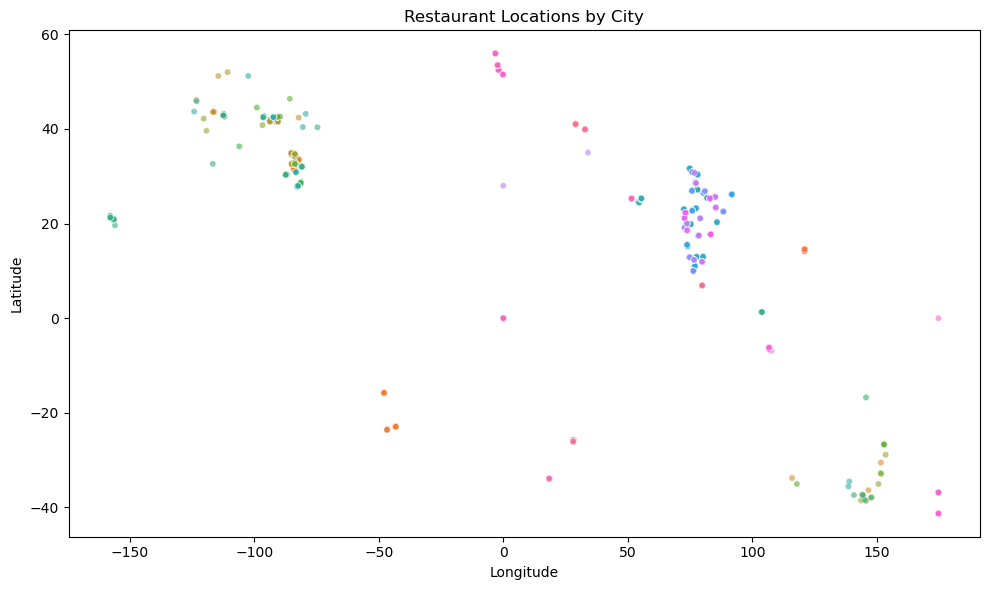


Top 10 cities by restaurant count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

Top 5 countries by restaurant count:
Country Code
1      8652
216     434
215      80
30       60
214      60
Name: count, dtype: int64

Plotting relationship between latitude and rating...


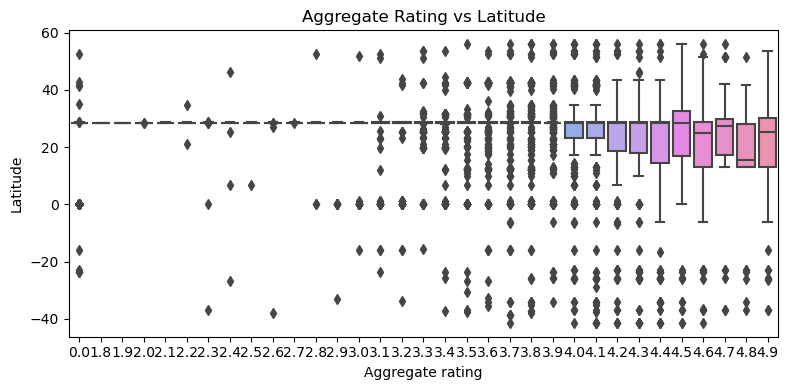


Plotting relationship between longitude and rating...


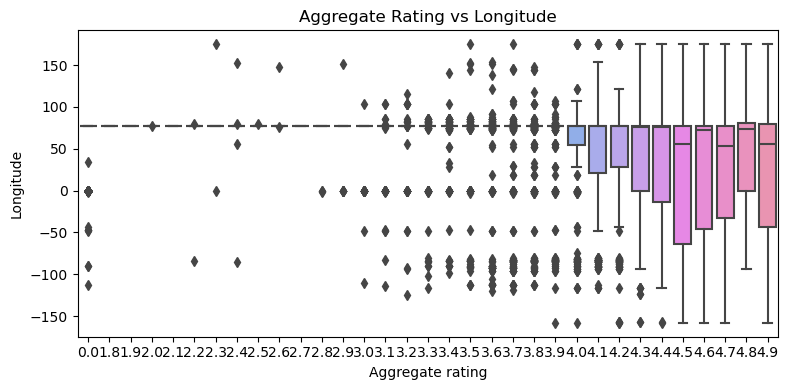

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Plotting restaurant locations by latitude and longitude...")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='City', legend=False, s=20, alpha=0.6)
plt.title('Restaurant Locations by City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

print("\nTop 10 cities by restaurant count:")
city_counts = df['City'].value_counts().head(10)
print(city_counts)

print("\nTop 5 countries by restaurant count:")
country_counts = df['Country Code'].value_counts().head(5)
print(country_counts)

print("\nPlotting relationship between latitude and rating...")
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Aggregate rating', y='Latitude')
plt.title('Aggregate Rating vs Latitude')
plt.tight_layout()
plt.show()

print("\nPlotting relationship between longitude and rating...")
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Aggregate rating', y='Longitude')
plt.title('Aggregate Rating vs Longitude')
plt.tight_layout()
plt.show()


# Level 2 : Task 1 

In [25]:
table_booking = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery = df['Has Online delivery'].value_counts(normalize=True) * 100
print(table_booking)
print(online_delivery)

avg_rating_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(avg_rating_booking)

delivery_rating = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
print(delivery_rating)


Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


# Level 2 : Task 2 

In [33]:
price_range_counts = df['Price range'].value_counts()
print(price_range_counts)

avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print(avg_rating_by_price)

color_rating = df.groupby('Rating color')['Aggregate rating'].mean().sort_values(ascending=False)
print(color_rating)


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Rating color
Dark Green    4.659801
Green         4.168119
Yellow        3.683429
Orange        3.051619
Red           2.297849
White         0.000000
Name: Aggregate rating, dtype: float64


# Level 2: Task 3 

In [34]:
df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)
df['Address Length'] = df['Address'].astype(str).apply(len)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
print(df[['Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']].head())


   Name Length  Address Length  Has Table Booking  Has Online Delivery
0           16              71                  1                    0
1           16              67                  1                    0
2           22              56                  1                    0
3            4              70                  0                    0
4           11              64                  1                    0


# Level 3 : Task 1 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = df[['Price range', 'Has Table Booking', 'Has Online Delivery', 'Votes']].fillna(0)
target = df['Aggregate rating'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f'{name} - MSE: {mse}, R2: {r2}')


Linear Regression - MSE: 1.6768067245748604, R2: 0.2633012163679982
Decision Tree - MSE: 0.1949699219124958, R2: 0.9143406916177658
Random Forest - MSE: 0.15497179466146818, R2: 0.9319137197202509
KNN Regressor - MSE: 0.1538365253793825, R2: 0.9324124960472717
Gradient Boosting - MSE: 0.11732489317447381, R2: 0.9484537455482213


# Level 3 : Task 2 

In [50]:
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print(cuisine_rating)

popular_cuisines = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)
print(popular_cuisines)

high_rated_cuisines = df[df['Aggregate rating'] >= 4.0]['Cuisines'].value_counts().head(10)
print(high_rated_cuisines)


Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64
Cuisines
Cafe                     36
North Indian, Mughlai    29
Italian                  25
North Indian             23
Chinese                  22
North Indian, Chinese    22
American            

# Level 3 : Task 3 

C:\Users\nalla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


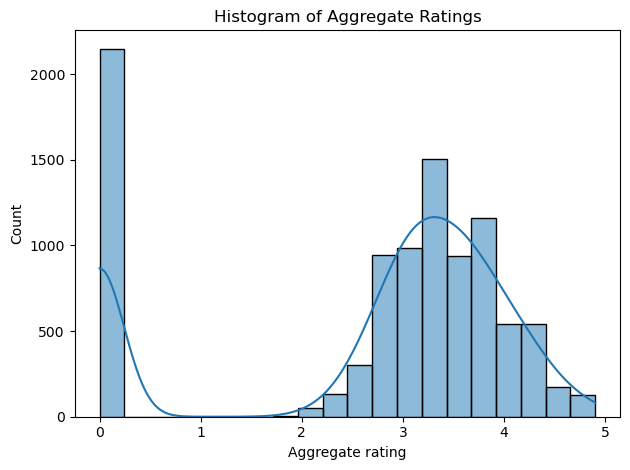

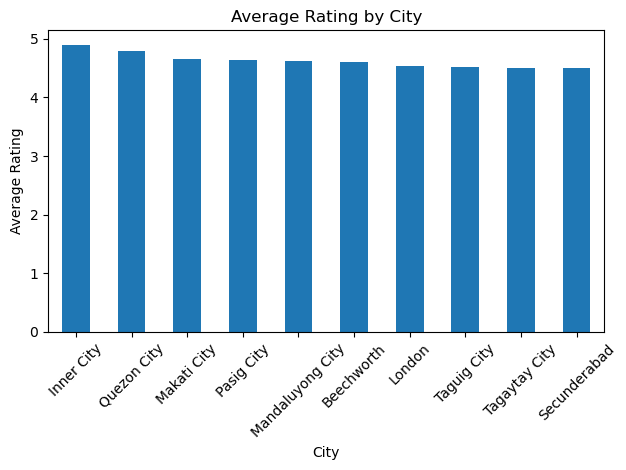

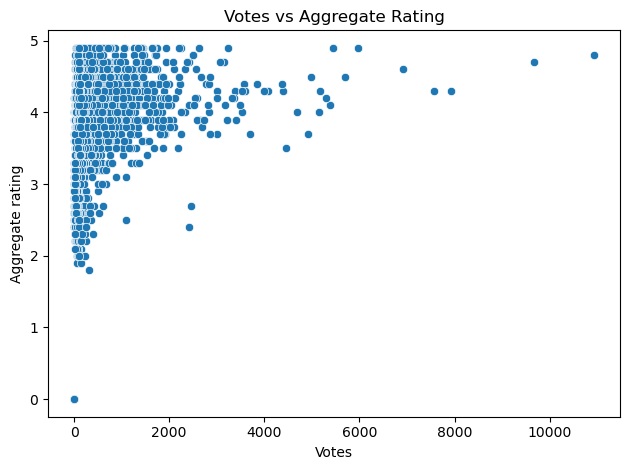

In [52]:
sns.histplot(df['Aggregate rating'].dropna(), bins=20, kde=True)
plt.title('Histogram of Aggregate Ratings')
plt.tight_layout()
plt.show()

city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
city_avg_rating.plot(kind='bar')
plt.title('Average Rating by City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.tight_layout()
plt.show()
